<img src='../frameworks/img/EU-Copernicus-EUM-WEKEO_banner_logo.png' align='right' width='75%'></img>

<a href="../Index.ipynb"><< Index</a>
<br>
<a href="./1_2_SRAL_file_structure.ipynb"><< SRAL file structure</a>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href="./1_4_SRAL_tracks.ipynb">SRAL tracks >></a>

<font color="#138D75">**Copernicus Marine Training Service**</font> <br>
**Copyright:** 2022 EUMETSAT <br>
**License:** MIT

<div class="alert alert-block alert-success">
<h3>Learn SRAL: Introductory</h3></div>

<div class="alert alert-block alert-warning">
    
<b>PREREQUISITES </b>
    
The following modules are prerequisites for this notebook:
- **[1_1_SRAL_data_access.ipynb](1_1_SRAL_data_access.ipynb)** (this will download the required SLSTR products for this notebook)

</div>
<hr>

# 1.3 Determining SRAL product coverage

### Data used

| Product Description  | Data Store collection ID|  WEkEO HDA ID | Product Navigator |
|:--------------------:|:-----------------------:|:-------------:|:-----------------:|
| Sentinel-3 SRAL level-1B | EO:EUM:DAT:0406 | EO:EUM:DAT:SENTINEL-3:SR_1_SRA___ | [link](https://navigator.eumetsat.int/product/EO:EUM:DAT:SENTINEL-3:SR_1_SRA___NTC?query=SRAL&s=advanced) |
| Sentinel-3 SRAL level-2 | EO:EUM:DAT:0415 | EO:EUM:DAT:SENTINEL-3:SR_2_WAT___ | [link](https://navigator.eumetsat.int/product/EO:EUM:DAT:SENTINEL-3:SR_2_WAT___NTC?query=SRAL&s=advanced) |

### Learning outcomes

At the end of this notebook you will know;
* Objective

### Outline

<div class="alert alert-info" role="alert">

## <a id='TOC_TOP'></a>Contents

</div>
    
 1. [Investigating SRAL coverage](#section1)

<hr>

In [1]:
# library imports
import cartopy
import glob
import matplotlib.pyplot as plt
import numpy as np
import os
from shapely.geometry import Polygon
import warnings
import xml.etree.ElementTree as ET
import datetime

warnings.filterwarnings('ignore')
plt.rcParams.update({'font.size': 12})

<div class="alert alert-info" role="alert">

## <a id='section1'></a>1. Investigating SLSTR coverage
[Back to top](#TOC_TOP)

</div>

In [2]:
# selecting SAFE directories
SAFE_directories = [
    os.path.join(os.getcwd(), 'products', 
    'S3B_SR_1_SRA____20220218T110359_20220218T115429_20220220T023624_3029_062_365______MAR_O_ST_004.SEN3'),
    os.path.join(os.getcwd(), 'products', 
    'S3B_SR_2_WAT____20220218T110400_20220218T115102_20220220T035329_2822_062_365______MAR_O_ST_004.SEN3')
    ]

In [3]:
# selecting SAFE manifest
SAFE_manifests = []
for SAFE_directory in SAFE_directories:
    SAFE_manifests.append(glob.glob(os.path.join(SAFE_directory, 'xfd*.xml'))[0])

In [4]:
polygons = []
tags = []
acq_times = []
for SAFE_manifest in SAFE_manifests:
    tags.append(SAFE_manifest.split('/')[-2])
    tree = ET.parse(SAFE_manifest)
    root = tree.getroot()
    polygon =  root.findall('.//gml:posList', {'gml':"http://www.opengis.net/gml"})
    polygons.append((polygon[0].text))
    acq_times.append((datetime.datetime.strptime(SAFE_manifest.split('/')[-2].split('_')[8],
                                                 "%Y%m%dT%H%M%S")
                      - datetime.datetime.strptime(SAFE_manifest.split('/')[-2].split('_')[7],
                                                   "%Y%m%dT%H%M%S")).total_seconds())

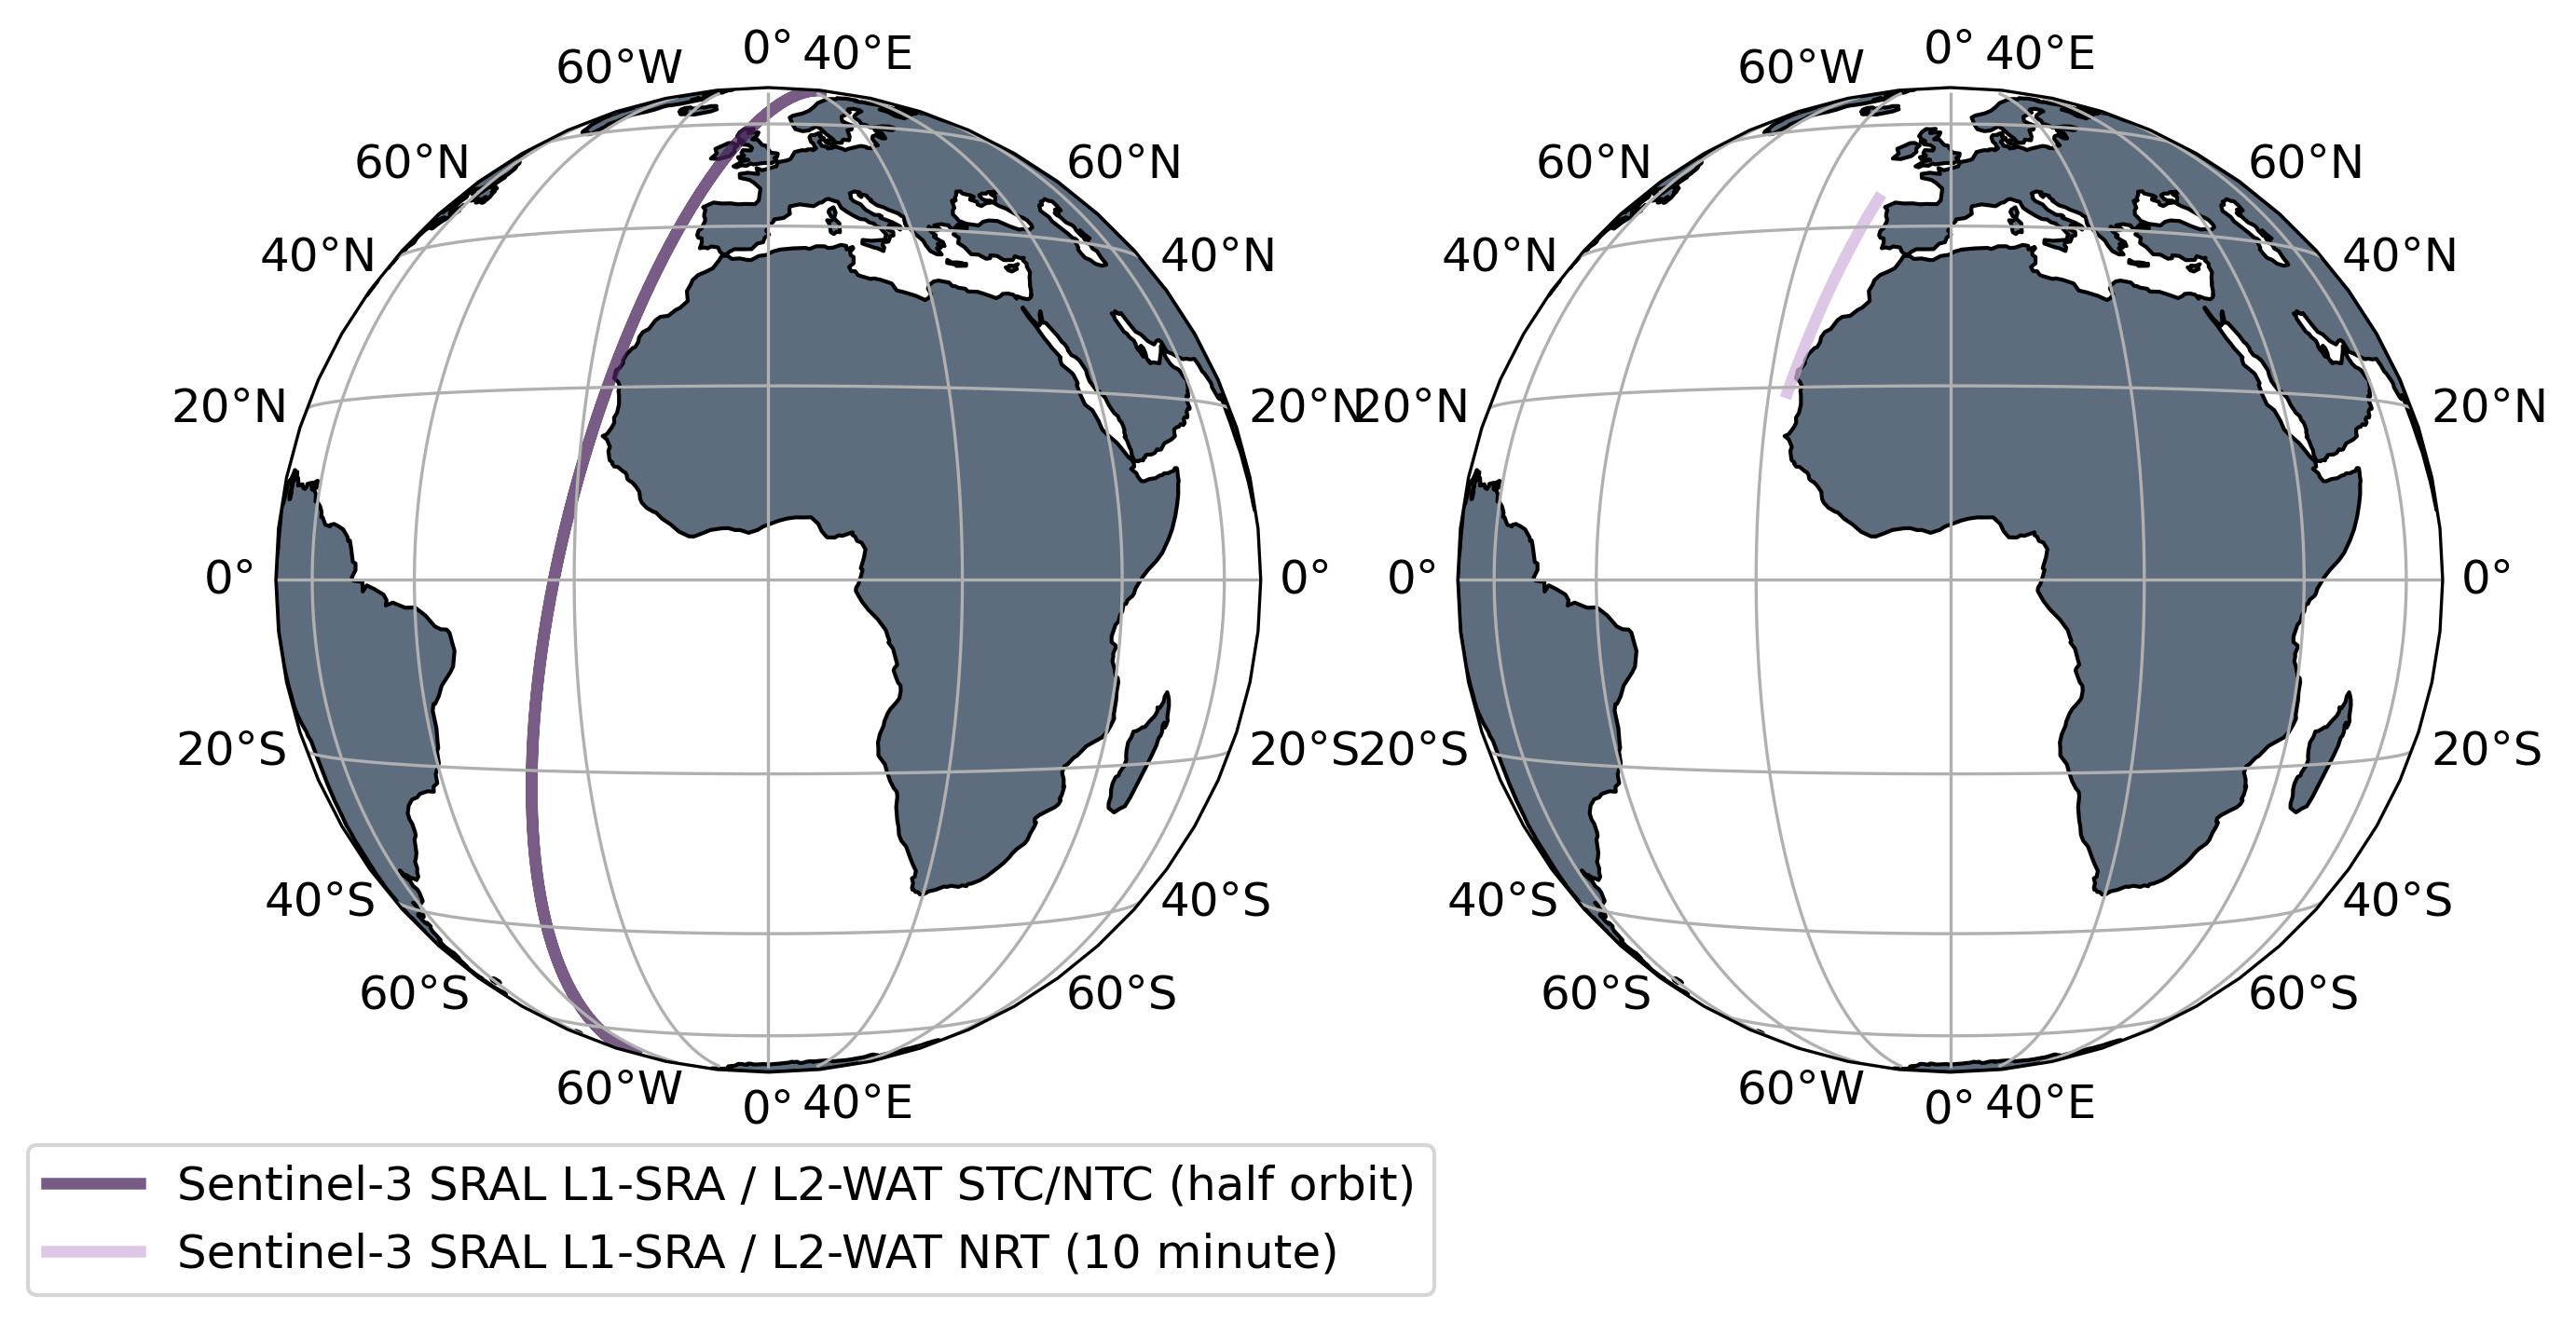

In [5]:
fig1 = plt.figure(figsize=(10, 10), dpi=300)

colours = ['#4A235A', '#D2B4DE']
labels = ['Sentinel-3 SRAL L1-SRA / L2-WAT STC/NTC (half orbit)', 'Sentinel-3 SRAL L1-SRA / L2-WAT NRT (10 minute)']
plots = []

for loc, colour, label, polygon, cut, acq_time in zip([1, 2], colours, labels, polygons, [False, True], acq_times):
    m = plt.subplot(1, 2, loc, projection=cartopy.crs.NearsidePerspective(central_longitude=0.0, 
                                                                          central_latitude=0.0))
    m.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='k', facecolor='#5D6D7E')
    m.set_global()

    gl = m.gridlines(draw_labels = True)
    reverse = True
    coords = np.asarray(polygon.split(' ')).astype('float')
    if cut:
        tcut = int(len(coords)*600/acq_time)
        p, = m.plot(coords[51:tcut:2], coords[50:tcut:2], alpha=0.74, color=colour, linewidth=3, transform=cartopy.crs.Geodetic(), zorder=2)
    else:
        p, = m.plot(coords[1::2], coords[0::2], alpha=0.74, color=colour, linewidth=3, transform=cartopy.crs.Geodetic(), zorder=2)
    plots.append(p)

plt.legend(plots, labels, loc='lower right', bbox_to_anchor=(0.0, -0.25))
plt.savefig('1_3_SRAL_coverage.png', bbox_inches='tight')

<hr>
<a href="../Index.ipynb"><< Index</a>
<br>
<a href="./1_2_SRAL_file_structure.ipynb"><< SRAL file structure</a>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href="./1_4_SRAL_tracks.ipynb">SRAL tracks >></a>
<hr>
<a href="https://gitlab.eumetsat.int/eumetlab/ocean">View on GitLab</a> | <a href="https://training.eumetsat.int/">EUMETSAT Training</a> | <a href=mailto:ops@eumetsat.int>Contact helpdesk for support </a> | <a href=mailto:Copernicus.training@eumetsat.int>Contact our training team to collaborate on and reuse this material</a></span></p>